In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path="/content/drive/MyDrive/IPL/matches.csv"
match= pd.read_csv(path)
print(match.shape)
match.head()

(756, 18)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
delivery=pd.read_csv('/content/drive/MyDrive/IPL/deliveries.csv')
print(delivery.shape)
delivery.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
total_runs_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_runs_df.shape

(1528, 3)

In [5]:
total_runs_df=total_runs_df[total_runs_df['inning']==1]

In [6]:
match=match.merge(total_runs_df[['match_id','total_runs']],left_on='id',right_on='match_id')
print(match.shape)
match.head()

(756, 20)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [7]:
# Total Match played by the teams
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [8]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Removing redundant teams

In [9]:
teams={'Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore',
       'Chennai Super Kings','Delhi Capitals','Kings XI Punjab','Rajasthan Royals','Kolkata Knight Riders'}

In [10]:
match['team1']=match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match['team2']=match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#Deccan chargers played most of the w.r.t old teams , as per the value_counts
match['team1']=match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['team2']=match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [11]:
match=match[match['team1'].isin(teams)]
match=match[match['team2'].isin(teams)]

In [12]:
match.shape

(641, 20)

In [13]:
match['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [14]:
match=match[match['dl_applied']==0]
match.shape

(626, 20)

In [15]:
match=match[['match_id','city','winner','total_runs']]
match.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158


In [16]:
delivery=match.merge(delivery,on='match_id')
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
delivery.shape

(149578, 24)

In [18]:
# Extracting Second Innings data
delivery=delivery[delivery['inning']==2]
print(delivery.shape)
delivery.head()

(72413, 24)


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [19]:
#Current Score and runs left
#find current score,runs_left
delivery['current_score']=delivery.groupby('match_id').cumsum()['total_runs_y']
delivery['runs_left']=delivery['total_runs_x']-delivery['current_score'] + 1

In [20]:
# Balls left
delivery['balls_left'] = 126 - (delivery['over']*6 + delivery['ball'])
delivery.head(7)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
130,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,11,197,114
131,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,11,197,113


In [21]:
#Current run rate,required run rate
delivery['crr']=(delivery['current_score']*6)/(120-delivery['balls_left'])
delivery['rrr']=round((delivery['runs_left']*6)/(delivery['balls_left']),3)
delivery.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,NaN,NaN,NaN,1,207,119,6.0,10.437
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,207,118,3.0,10.525


In [22]:
#wickets left
delivery['player_dismissed']=delivery['player_dismissed'].fillna('0')
delivery['player_dismissed']=delivery['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery['player_dismissed']=delivery['player_dismissed'].astype('int')
wickets=delivery.groupby('match_id').cumsum()['player_dismissed'].values
delivery['wickets_left']=10-wickets

In [23]:
#Result
def result(row):
    if row['batting_team']==row['winner']:
        return 1
    else:
        return 0

In [24]:
delivery['result']=delivery.apply(result,axis=1)
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,crr,rrr,wickets_left,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,6.0,10.437,10,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,3.0,10.525,10,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,2.0,10.615,10,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,4.5,10.603,10,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,8.4,10.487,10,0


Data Cleaning

In [25]:
#Extracting out relevent features from delivery dataframe
final_df=delivery[['batting_team','bowling_team','city','runs_left','balls_left',
                   'total_runs_x','crr','rrr','wickets_left','result']]

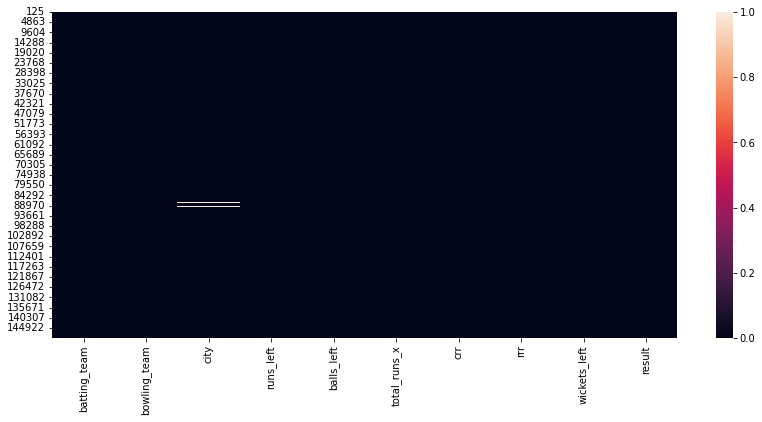

In [26]:
plt.figure(figsize=(14,6))
sns.heatmap(final_df.isnull())
plt.show()

In [27]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
total_runs_x      0
crr               0
rrr               5
wickets_left      0
result            0
dtype: int64

Dropping the null values

In [28]:
final_df.dropna(inplace=True)
final_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(71576, 10)

In [29]:
final_df=final_df[final_df['balls_left']!=0]
print(final_df['rrr'].describe())
final_df.shape

count    71342.000000
mean        10.568474
std         14.041845
min       -516.000000
25%          7.268000
50%          9.000000
75%         11.032000
max        684.000000
Name: rrr, dtype: float64


(71342, 10)

In [30]:
final_df=final_df.sample(final_df.shape[0])
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left,result
56899,Kings XI Punjab,Deccan Chargers,Dharamsala,95,17,198,6.058252,33.529,1,0
132486,Kolkata Knight Riders,Rajasthan Royals,Kolkata,70,65,144,8.181818,6.462,7,1
49662,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,129,64,175,5.035714,12.094,6,0
125314,Rajasthan Royals,Chennai Super Kings,Pune,113,50,210,8.400000,13.560,6,0
94176,Chennai Super Kings,Mumbai Indians,Mumbai,110,75,157,6.400000,8.800,9,1


In [31]:
#splitting data
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [32]:
#shape of X_train ,y_train
print(X_train.shape)
print(y_train.shape)

(57073, 9)
(57073,)


In [33]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left
148791,Mumbai Indians,Chennai Super Kings,Chennai,55,55,136,7.569231,6.000,8
25698,Kings XI Punjab,Kolkata Knight Riders,Port Elizabeth,142,103,153,4.235294,8.272,9
123397,Delhi Daredevils,Mumbai Indians,Mumbai,30,16,204,10.096154,11.250,7
16585,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,91,18,197,6.294118,30.333,2
65509,Mumbai Indians,Deccan Chargers,Mumbai,0,10,100,5.509091,0.000,5


In [34]:
#Categorical Columns transformation using One Hot Encoding
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [35]:
#PipeLine formation
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [36]:
#Prediction
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.799425327633331

In [37]:
pipe.predict_proba(X_test)[0]

array([0.47309412, 0.52690588])

In [38]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left,result
56899,Kings XI Punjab,Deccan Chargers,Dharamsala,95,17,198,6.058252,33.529,1,0
132486,Kolkata Knight Riders,Rajasthan Royals,Kolkata,70,65,144,8.181818,6.462,7,1
49662,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,129,64,175,5.035714,12.094,6,0
125314,Rajasthan Royals,Chennai Super Kings,Pune,113,50,210,8.400000,13.560,6,0
94176,Chennai Super Kings,Mumbai Indians,Mumbai,110,75,157,6.400000,8.800,9,1


In [39]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','total_runs_x','crr','rrr','wickets_left']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose_proba'] = np.round(result.T[0]*100,1)
    temp_df['win_proba'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    batting_team=temp_df['batting_team'].values[0]
    bowling_team=temp_df['bowling_team'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    #wickets = list(temp_df['wickets'].values)
    #new_wickets = wickets[:]
    #new_wickets.insert(0,10)
    #wickets.append(0)
    #w = np.array(wickets)
    #nw = np.array(new_wickets)
    #temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print('Batting_team:- ',batting_team)
    print('Bowling_team:- ',bowling_team)
    print("Target-",target)
    
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_left','lose_proba','win_proba']]
    return temp_df,target

In [41]:
import numpy as np 
temp_df,target=match_progression(delivery,1,pipe)
temp_df

Batting_team:-  Royal Challengers Bangalore
Bowling_team:-  Sunrisers Hyderabad
Target- 207


,end_of_over,runs_after_over,wickets_left,lose_proba,win_proba
130,1,10,10,88.8,11.2
136,2,1,10,91.8,8.2
142,3,16,10,84.5,15.5
148,4,11,10,79.2,20.8
155,5,5,10,79.6,20.4
162,6,10,9,84.5,15.5
168,7,7,8,90.2,9.8
174,8,13,8,85.0,15.0
180,9,10,8,80.9,19.1
187,10,10,8,76.0,24.0


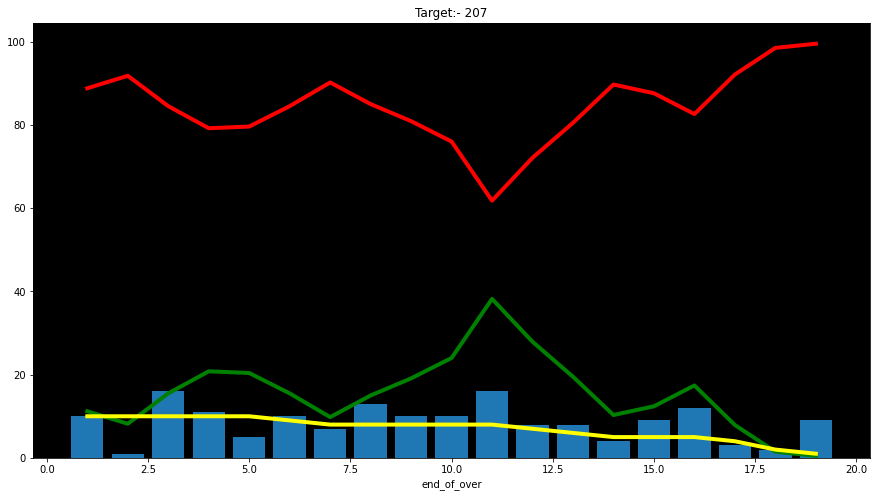

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(temp_df['end_of_over'],temp_df['lose_proba'],color='red',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['win_proba'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['wickets_left'],color='yellow',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel('end_of_over')
plt.title('Target:- '+ str(target))
plt.show()